# Task 3

## Imports

In [17]:
import ultralytics
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from IPython.display import Image

ultralytics.checks()

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Core(TM) i7-10510U 1.80GHz)
Setup complete ✅ (8 CPUs, 15.4 GB RAM, 531.7/620.0 GB disk)


## Load model

In [4]:
from ultralytics import YOLO

# Load a pretrained model
model = YOLO('yolov8s.pt')

# Create folder to save the results
try:
    folder_name = "results"
    os.mkdir(folder_name)
except FileExistsError:
    pass

input_image_folder = 'imgs'

In [12]:
# Predict bounding boxes for the images
results = model.predict(input_image_folder)

boxes = []
for result in results:
    # Get bounding boxes object for bounding box outputs
    boxes.append(result.boxes)
    # Save image with bounding boxes and predictions to folder
    image_name = result.path.split(os.sep)[-1]
    result.save(filename=os.path.join(folder_name, image_name))

print(boxes[0])


image 1/50 /home/m/Desktop/2S/VC/proj/p2/imgs/0.jpg: 640x480 1 toothbrush, 140.3ms
image 2/50 /home/m/Desktop/2S/VC/proj/p2/imgs/1.jpg: 640x480 (no detections), 152.7ms
image 3/50 /home/m/Desktop/2S/VC/proj/p2/imgs/10.jpg: 640x480 (no detections), 184.7ms
image 4/50 /home/m/Desktop/2S/VC/proj/p2/imgs/11.jpg: 480x640 1 kite, 2 remotes, 138.0ms
image 5/50 /home/m/Desktop/2S/VC/proj/p2/imgs/12.jpg: 640x480 1 remote, 130.0ms
image 6/50 /home/m/Desktop/2S/VC/proj/p2/imgs/13.jpg: 640x480 (no detections), 131.8ms
image 7/50 /home/m/Desktop/2S/VC/proj/p2/imgs/14.jpg: 480x640 (no detections), 128.5ms
image 8/50 /home/m/Desktop/2S/VC/proj/p2/imgs/15.jpg: 480x640 (no detections), 128.3ms
image 9/50 /home/m/Desktop/2S/VC/proj/p2/imgs/16.jpg: 480x640 1 remote, 128.4ms
image 10/50 /home/m/Desktop/2S/VC/proj/p2/imgs/17.jpg: 640x480 1 clock, 183.8ms
image 11/50 /home/m/Desktop/2S/VC/proj/p2/imgs/18.jpg: 640x480 1 remote, 183.3ms
image 12/50 /home/m/Desktop/2S/VC/proj/p2/imgs/19.jpg: 640x480 (no detec

## Visualize results

In [27]:
def loadImage(num, dataDir="imgs", size = 0.1):
    
    img = cv2.imread(os.path.join(dataDir, f'{num}.jpg'))
    img = cv2.resize(img, (0, 0), fx = size, fy = size)
    return img

def render(image):
    if image.dtype == np.float64:
        image = cv2.convertScaleAbs(image)
    if len(image.shape) == 3 and image.shape[2] == 3: # BGR or RGB
        if np.array_equal(image[:, :, 0], image[:, :, 2]):
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_bytes = cv2.imencode('.png', image)[1].tobytes()
    display(Image(data=img_bytes))

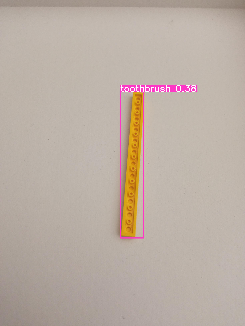

In [28]:
img = loadImage(0, folder_name)

render(img)